In [ ]:
Build a model to predict Milk Quality 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report




In [3]:
df =pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
df.shape

(1059, 8)

In [ ]:
#Checking the Null value

In [25]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [18]:
#converting grade to integer 
f["Grade"]=df["Grade"].replace(["low"],0)
f["Grade"]=df["Grade"].replace(["medium"],1)
f["Grade"]=df["Grade"].replace(["high"],2)

In [20]:
df['Grade']

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

In [ ]:
#finding and removing duplicate rows

In [26]:
df.duplicated().sum()

976

In [27]:
df.loc[df.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,2
48,9.5,34,1,1,0,1,255,0
50,6.6,37,1,1,1,1,255,2
51,5.5,45,1,0,1,1,250,0
52,4.5,60,0,1,1,1,250,0
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


In [28]:
df.dtypes


pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object

In [29]:
#Split Into Training and Test Sets
X = df.drop('Grade',axis=1).values
y = df[["Grade"]]

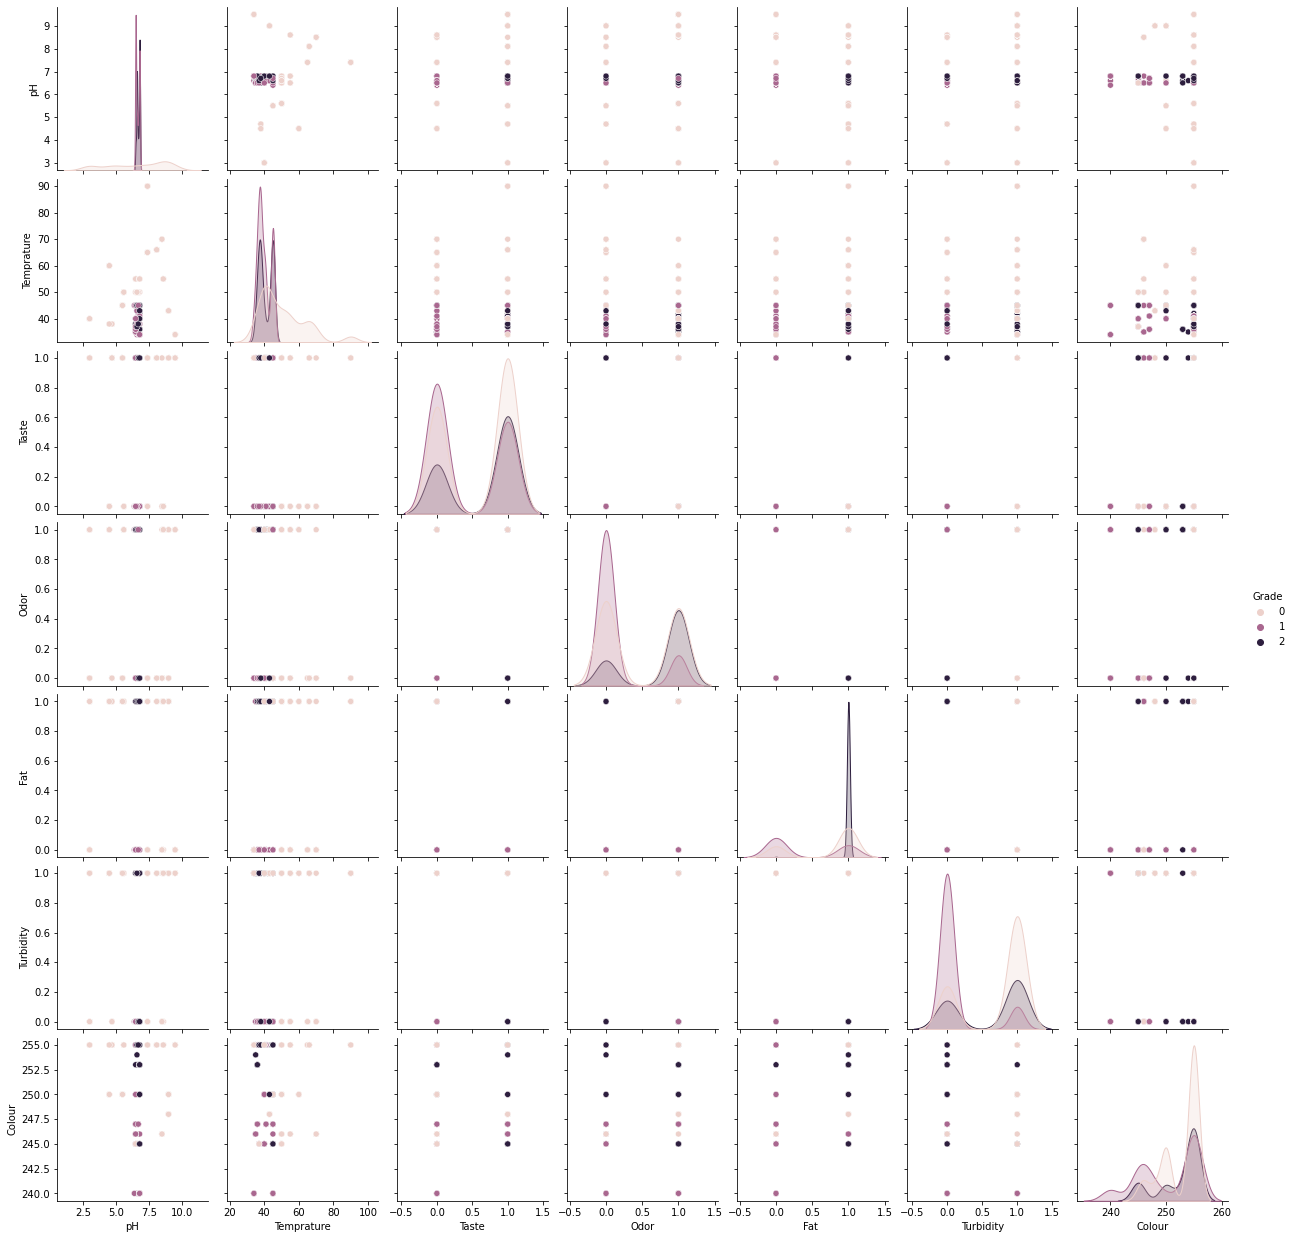

In [31]:
p = sns.pairplot(df,hue="Grade")
plt.show()

In [33]:
#Scaling the data:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X))
X.head()

,0,1,2,3,4,5,6
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


In [47]:
#Creating a classifier using KNN
test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = KNeighborsClassifier(i) #setting up a knn classifier
  model=knn.fit(X_train,y_train.values.ravel()) #fitting the model
  # computing the accuracy for both the trainig and the test data
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


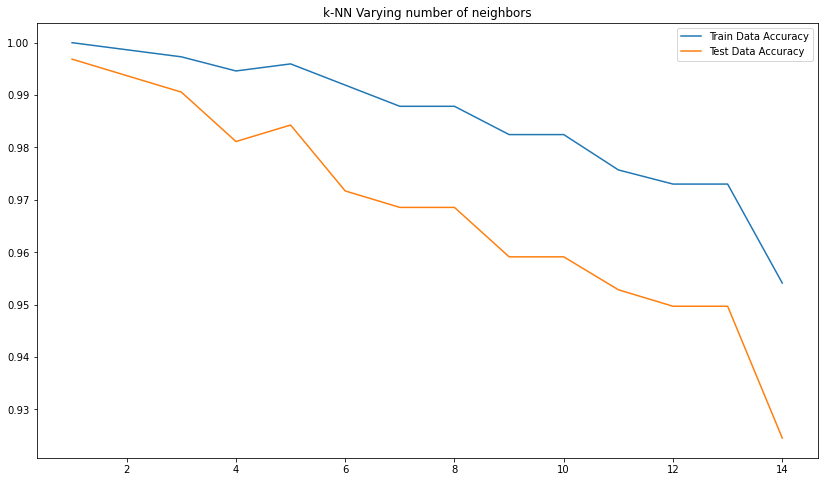

In [50]:
plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sns.lineplot(range(1,15),train_acc,label='Train Data Accuracy')
sns.lineplot(range(1,15),test_acc,label='Test Data Accuracy')
plt.show()

In [52]:
#check model performance
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train.values.ravel())
knn.score(X_test,y_test.values.ravel())

0.9811320754716981

In [59]:
#evaluation
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       1.00      1.00      1.00       127
           2       0.99      1.00      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

